---
title: "Tutorial 5"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: false
    code-summary: "Show the code"
---

## Topics
* Standard error vs. Standard deviation
* Boostrapping
* Confidence Intervals

## Standard error vs. standard deviation

In [1]:
import numpy as np
import seaborn as sns

np.random.seed(42)
sns.set_theme(style="whitegrid")

Let's define a "population" of size 1,000,000. Each member of the population will be a number from the standard normal distribution. We will be using the [numpy function](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html) `randn`

In [4]:
# מדגם רנדומלי של משתנה עם ממוצע 0 וסטיית תקן 1
population = np.random.randn(1000000)

In [5]:
population

array([ 0.16917185, -0.12150516,  1.15662527, ...,  0.23700925,
       -0.12582283,  1.78174855])

What's the population's mean and standard deviation?


In [6]:
mean_value = population.mean()
std = population.std()
print(f"The mean value is {mean_value} and the standard deviation is {std}")

The mean value is -0.00024325316470930495 and the standard deviation is 1.0013010726195146


What does the distribution of the population look like?


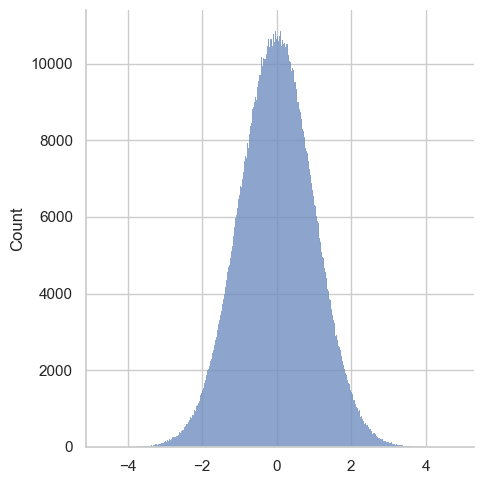

In [7]:
sns.displot(population)

If this were the real world, sampling 1,000,000 people would be difficult. Let's say that our budget allowed us to sample only 100 people at a time. How can we simulate that?

In [8]:
sample_size = 100
sample_100 = np.random.choice(population, sample_size)

What's the sample's mean and standard deviation?


In [13]:
mean_100 = sample_100.mean()
std_100 = sample_100.std()
print(f"The mean value is {mean_100}\nThe standard deviation is {std_100}")

The mean value is 0.05503209488251656
The standard deviation is 1.0052533524475757


Notice that our sample's mean value is pretty different from that of the population. What if we take a bigger sample size?

In [14]:
sample_size = 1000
sample_1000 = np.random.choice(population, sample_size)
mean_1000 = sample_1000.mean()
std_1000 = sample_1000.std()
print(f"The mean value is {mean_1000}\nThe standard deviation is {std_1000}")

The mean value is -0.010130216950937946
The standard deviation is 1.0063538199761677


Or smaller...

In [15]:
sample_size = 5
sample_5 = np.random.choice(population, sample_size)
mean_5 = sample_5.mean()
std_5 = sample_5.std()
print(f"The mean value is {mean_5}\nThe standard deviation is {std_5}")

The mean value is -0.16363943907706252
The standard deviation is 0.8655058149956234


The standard error of the mean (SEM) measures the precision of the estimate of the sample mean. We can use the formula:  
  
$\text{SEM} = \frac{\sigma}{\sqrt{n}}$

* $\sigma$ = the standard deviation of the sample
* $n$ = the sample size

Now we can compare our standard errors using the different sample sizes.


In [16]:
se_5 = std_5/np.sqrt(5)
se_100 = std_100/np.sqrt(100)
se_1000 = std_1000/np.sqrt(1000)

print(f"The SEM when the sample size was 5 was {se_5}")
print(f"The SEM when the sample size was 100 was {se_100}")
print(f"The SEM when the sample size was 1000 was {se_1000}")

The SEM when the sample size was 5 was 0.38706596745031413
The SEM when the sample size was 100 was 0.10052533524475757
The SEM when the sample size was 1000 was 0.03182370203135746


# Bootstrapping

Bootstrapping is a statistical method that involves repeatedly resampling a dataset with replacement to estimate the distribution of a statistic. This technique allows for the assessment of the accuracy and variability of sample estimates, such as the mean or standard deviation, without making strict assumptions about the underlying population distribution. By generating many resampled datasets (called bootstrap samples) and calculating the statistic of interest for each sample, bootstrapping provides an empirical approximation of the sampling distribution. This method is particularly useful when dealing with small samples or when traditional parametric assumptions cannot be applied.

Let's create a numpy array to represent heights of females at the Faculta


In [19]:
np.random.seed(42)
mean = 162.2
std = 5.5
sample_size = 1000
heights = np.random.normal(loc=mean, 
                           scale=std, 
                           size=sample_size)

# sample mean
mean_value = heights.mean()

# population standard deviation
std = heights.std()

print(f"The population's mean value is {mean_value}\nThe standard deviation is {std}")


The population's mean value is 162.30632630702277
The standard deviation is 5.382994142610448


Now we can construct a simulated sampling distribution

In [28]:
boot_straps = 5000
sample_size
sample_means = np.zeros(boot_straps)
for ii in range(boot_straps):
    sample = np.random.choice(heights, 
                              size=sample_size,
                              replace=True)
    sample_means[ii]= sample.mean()

In [29]:
# now we can find the standard deviation of the means
se_mean_height_bootstrap = sample_means.std()
print(f"The standard error of the mean calculated using bootstrapping is: {se_mean_height_bootstrap:.6f}")

The standard error of the mean calculated using bootstrapping is: 0.172134


Reminder, for the mean, it is also possible to estimate the Standard Error (SE) of the mean by dividing the standard deviation (STD) of the values by the square root of the sample size. The formula for the Standard Error of the Mean (SEM) is:

$\text{SEM} = \frac{\sigma}{\sqrt{n}}$

where $\sigma$ is the standard deviation of the sample, and $n$ is the sample size.

For other statistics, such as the median, there is no such analytical formula. The utility of the bootstrap method lies in its ability to estimate the SE of these other statistics. By repeatedly resampling the data with replacement and calculating the statistic of interest for each resample, bootstrapping provides an empirical distribution of the statistic. From this distribution, we can estimate the SE and other measures of variability.

In [22]:
se_mean_height_analytical = heights.std()/np.sqrt(sample_size)
print(f"The standard error of the mean calculated using the analytical formula is: {se_mean_height_analytical:.3f}")

The standard error of the mean calculated using the analytical formula is: 0.170


## Confidence Intervals

We can also compute the confidence interval for our estimate of the mean. Let's say we want the 90 percent confidence interval.


In [30]:
conf_level = 0.9
low_bound = (1-conf_level)/2
up_bound = (1+conf_level)/2
CI = (np.quantile(sample_means, low_bound),
      np.quantile(sample_means, up_bound)) 

In [31]:
print(f"The lower bound of the confidence interval is: {CI[0]}")
print(f"The upper bound of the confidence interval is: {CI[1]}")

The lower bound of the confidence interval is: 162.02571235883332
The upper bound of the confidence interval is: 162.59195775885198


## Can you bootsrap confidence interval for the median?

In [33]:
#| code-fold: true
#| code-summary: "Answer"

# make a bootstrapped population of the median
boot_straps = 500
sample_size
sample_medians = np.zeros(boot_straps)
for ii in range(boot_straps):
    sample = np.random.choice(heights, 
                              size=sample_size,
                              replace=True)
    sample_medians[ii]= np.median(sample)

# compute CI for the bootstrapped population of the median
conf_level = 0.9
low_bound = (1-conf_level)/2
up_bound = (1+conf_level)/2
CI = (np.quantile(sample_medians, low_bound),
      np.quantile(sample_medians, up_bound)) 

# # uncomment below:
print(f"The lower bound of the confidence interval is: {CI[0]}")
print(f"The upper bound of the confidence interval is: {CI[1]}")

The lower bound of the confidence interval is: 161.98244665378837
The upper bound of the confidence interval is: 162.62144039661362
